# Search stocks

In [12]:
import sys
!{sys.executable} -m pip install pandas_datareader yfinance matplotlib

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621


In [13]:
import pandas as pd
from pandas import DataFrame
import json
from pandas_datareader import data as pdr
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt



In [14]:
yf.pdr_override()
# no need for requests or BeautifulSoup use read_html
df = pd.read_html('https://en.wikipedia.org/wiki/Nasdaq-100')[3]
# convert symbol column to list

tickers = df['Ticker'].values.tolist()
#t = [x.replace('.', '-') for x in tickers] 
print(tickers)
df
#yf.download("SPY AAPL", start="2017-01-01", end="2017-04-30")

['ATVI', 'ADBE', 'ADP', 'ABNB', 'ALGN', 'GOOGL', 'GOOG', 'AMZN', 'AMD', 'AEP', 'AMGN', 'ADI', 'ANSS', 'AAPL', 'AMAT', 'ASML', 'AZN', 'TEAM', 'ADSK', 'BIDU', 'BIIB', 'BKNG', 'AVGO', 'CDNS', 'CHTR', 'CTAS', 'CSCO', 'CTSH', 'CMCSA', 'CEG', 'CPRT', 'COST', 'CRWD', 'CSX', 'DDOG', 'DXCM', 'DOCU', 'DLTR', 'EBAY', 'EA', 'EXC', 'FAST', 'FISV', 'FTNT', 'GILD', 'HON', 'IDXX', 'ILMN', 'INTC', 'INTU', 'ISRG', 'JD', 'KDP', 'KLAC', 'KHC', 'LRCX', 'LCID', 'LULU', 'MAR', 'MRVL', 'MTCH', 'MELI', 'META', 'MCHP', 'MU', 'MSFT', 'MRNA', 'MDLZ', 'MNST', 'NTES', 'NFLX', 'NVDA', 'NXPI', 'ORLY', 'OKTA', 'ODFL', 'PCAR', 'PANW', 'PAYX', 'PYPL', 'PEP', 'PDD', 'QCOM', 'REGN', 'ROST', 'SGEN', 'SIRI', 'SWKS', 'SPLK', 'SBUX', 'SNPS', 'TMUS', 'TSLA', 'TXN', 'VRSN', 'VRSK', 'VRTX', 'WBA', 'WDAY', 'XEL', 'ZM', 'ZS']


,Company,Ticker,GICS Sector,GICS Sub-Industry
0,Activision Blizzard,ATVI,Communication Services,Interactive Home Entertainment
1,Adobe Inc.,ADBE,Information Technology,Application Software
2,ADP,ADP,Information Technology,Data Processing & Outsourced Services
3,Airbnb,ABNB,Consumer Discretionary,Internet & Direct Marketing Retail
4,Align Technology,ALGN,Health Care,Health Care Supplies
...,...,...,...,...
97,Walgreens Boots Alliance,WBA,Consumer Staples,Drug Retail
98,"Workday, Inc.",WDAY,Information Technology,Application Software
99,Xcel Energy,XEL,Utilities,Multi-Utilities
100,Zoom Video Communications,ZM,Information Technology,Application Software


In [15]:
ma_count = 21
ma_count1 = ma_count * 5

print(dt.datetime(2021,1,1))
data = pdr.get_data_yahoo(tickers, start=dt.datetime(2019,1,1), end=dt.date.today())['Close']
data.tail()


2021-01-01 00:00:00
[*********************100%***********************]  102 of 102 completed


,AAPL,ABNB,ADBE,ADI,ADP,ADSK,AEP,ALGN,AMAT,AMD,...,TSLA,TXN,VRSK,VRSN,VRTX,WBA,WDAY,XEL,ZM,ZS
Date,,,,,,,,,,,,,,,,,,,,,
2022-07-06,142.919998,92.879997,382.829987,144.699997,217.259995,176.729996,94.800003,249.539993,86.559998,75.349998,...,695.200012,150.809998,178.119995,176.059998,291.160004,37.779999,145.940002,71.010002,117.059998,163.750000
2022-07-07,146.350006,97.500000,390.890015,148.570007,216.520004,182.250000,94.519997,259.640015,90.750000,79.300003,...,733.630005,154.690002,178.029999,178.619995,294.170013,38.209999,147.600006,69.580002,120.739998,167.429993
2022-07-08,147.039993,97.349998,389.440002,149.940002,217.270004,179.830002,94.339996,261.519989,91.190002,79.349998,...,752.289978,155.529999,178.070007,178.630005,294.290009,37.549999,148.009995,69.599998,119.800003,166.889999
2022-07-11,144.869995,95.099998,384.160004,147.559998,214.889999,176.720001,95.010002,249.479996,88.620003,76.949997,...,703.030029,153.559998,177.839996,175.839996,294.070007,37.430000,145.539993,69.889999,108.379997,162.419998
2022-07-12,145.860001,96.550003,375.540009,148.050003,212.289993,172.330002,94.370003,248.979996,88.730003,76.360001,...,699.210022,154.460007,174.080002,174.429993,290.010010,37.970001,137.779999,69.500000,107.989998,150.919998


In [16]:
ma = data.rolling(window=ma_count).mean()
ma_pers = data.div(ma).mul(100).sub(100)

ma_week = data.rolling(window=ma_count1).mean()
ma_week_pers = data.div(ma_week).mul(100).sub(100)

df_prep = []
tickers = ma_pers.columns.values.tolist()
for ticker in tickers:
    ma_last = None
    counter = 0
    ma_d = 0
    ma_w = 0
    ma_last = 0
    date = None
    for index, row in ma_pers.iterrows():
        ma_d = ma_pers[ticker][index]
        ma_w = ma_week_pers[ticker][index]
        if ma_d < ma_w:
            date = index
            counter += 1
            ma_last= ma_d - ma_w
        else:
            ma_last = 0
            counter=0
    df_prep.append([ticker, counter, ma_last, ma_count, ma_count1, ma_d, ma_w, date, "cross"]) 
df = DataFrame(df_prep, columns=['name', 'count', 'ma_diff', 'ma_size', 'ma_size1', 'ma_daily', 'ma_weekly', 'last_date', 'ma_type'])\
    .sort_values(by=['count', 'ma_diff'], ascending=False)

lead_comps_df = df[df['count'] >= 2].drop_duplicates(subset=['name'])
lead_comps = lead_comps_df['name'].values.tolist()
lead_comps_df

,name,count,ma_diff,ma_size,ma_size1,ma_daily,ma_weekly,last_date,ma_type
32,DLTR,179,-2.240042,21,105,3.720012,5.960054,2022-07-12,cross
96,VRTX,148,-6.486723,21,105,4.984255,11.470978,2022-07-12,cross
10,AMGN,133,-0.804554,21,105,1.978069,2.782623,2022-07-12,cross
91,TMUS,97,-2.924834,21,105,1.287606,4.212440,2022-07-12,cross
16,AZN,94,-0.290183,21,105,3.621642,3.911825,2022-07-12,cross
62,MNST,40,-8.708917,21,105,4.780692,13.489609,2022-07-12,cross
69,NTES,28,-0.405129,21,105,-8.002413,-7.597284,2022-07-12,cross
85,SGEN,23,-18.855075,21,105,6.426050,25.281125,2022-07-12,cross
87,SNPS,20,-0.236587,21,105,0.422785,0.659372,2022-07-12,cross
78,PDD,20,-25.667151,21,105,-8.244266,17.422884,2022-07-12,cross


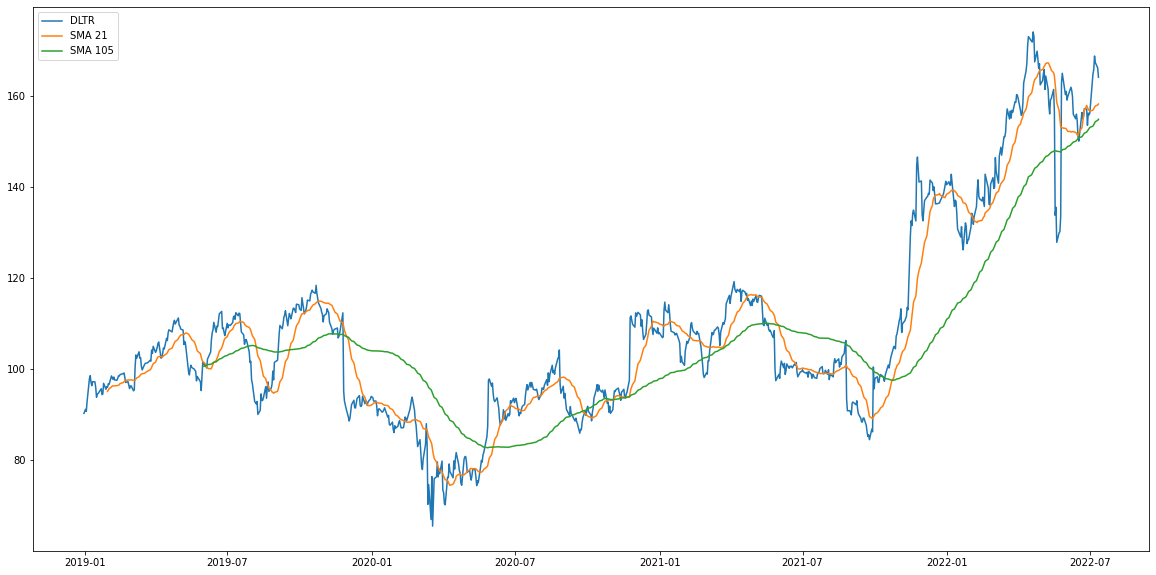

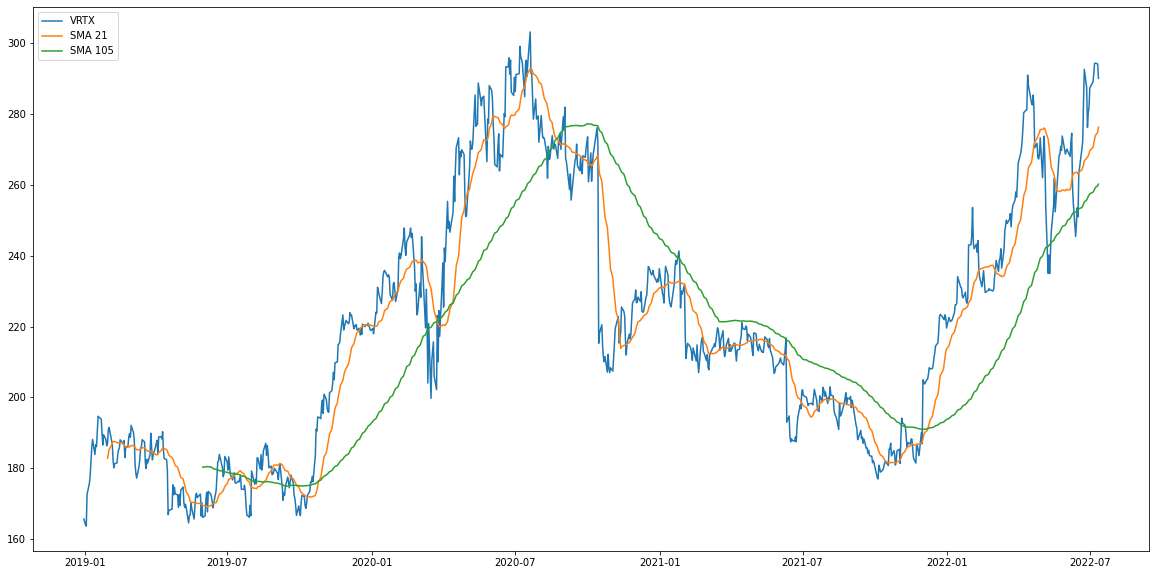

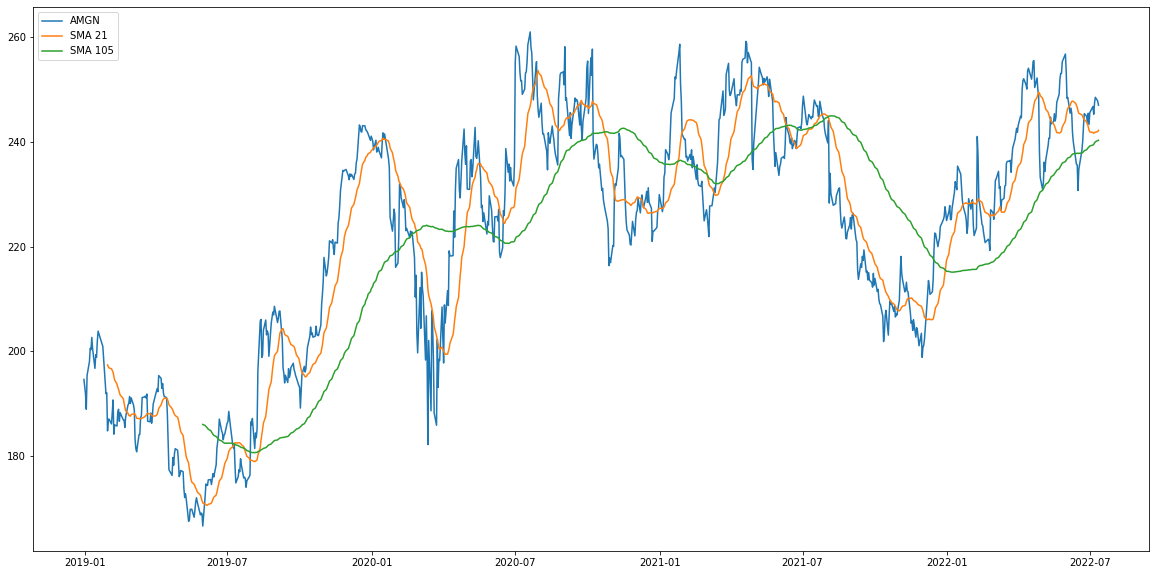

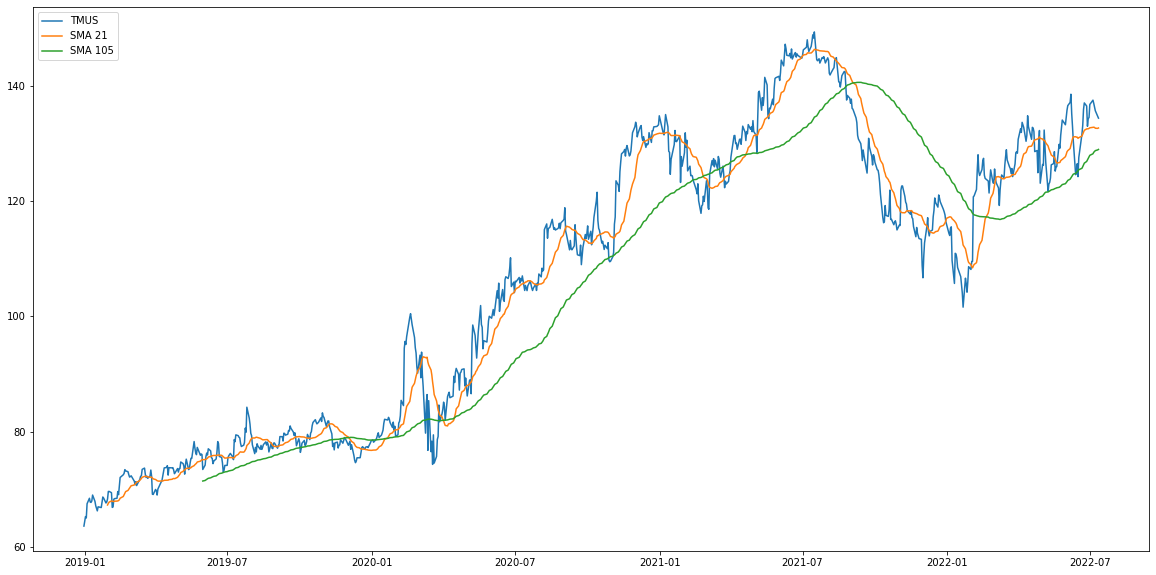

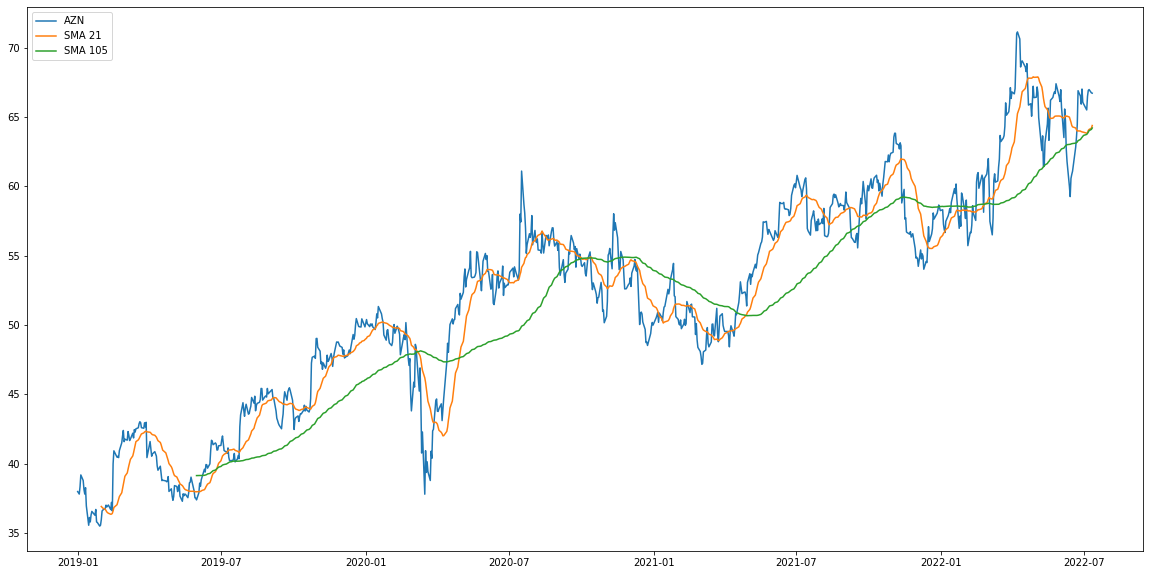

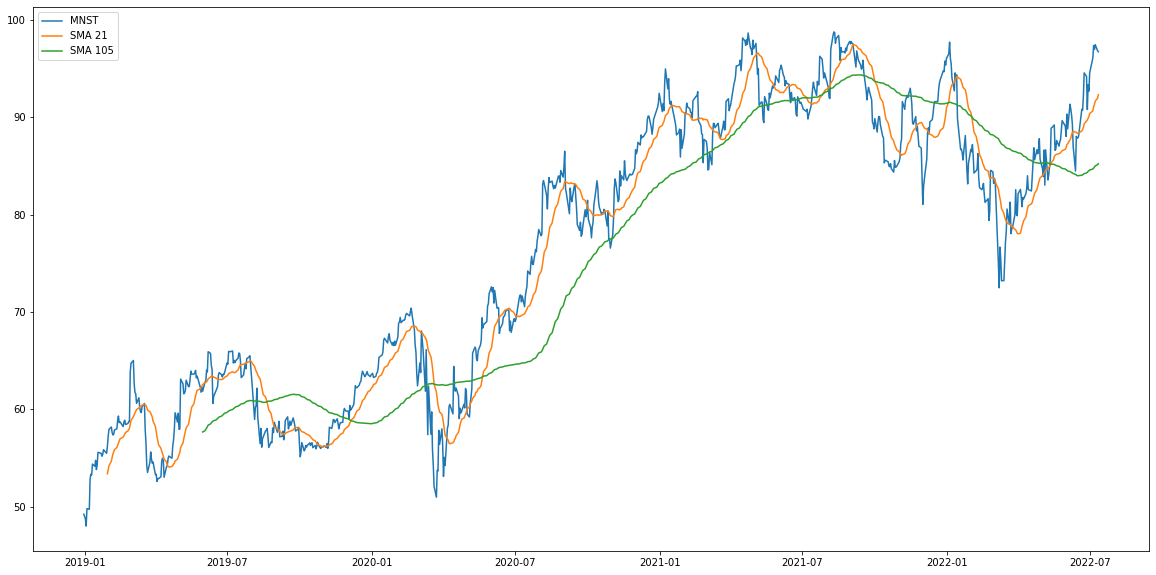

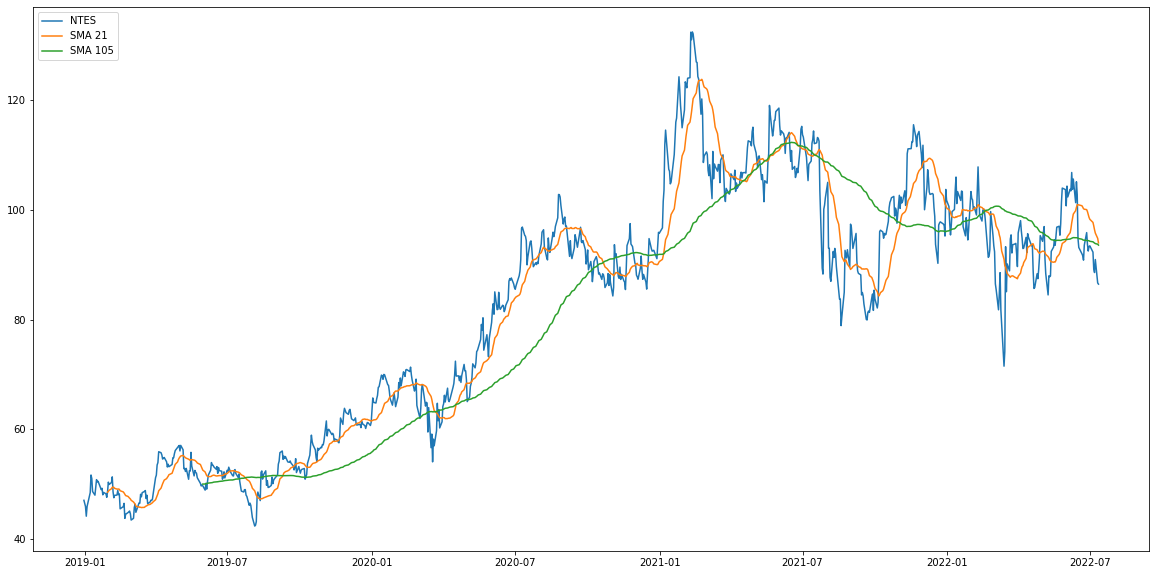

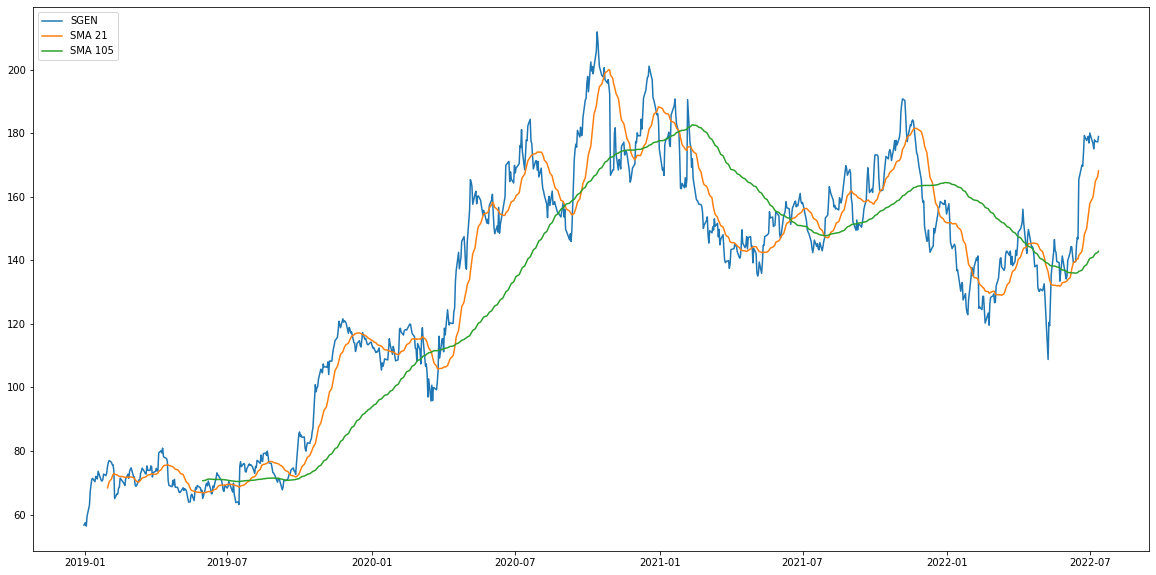

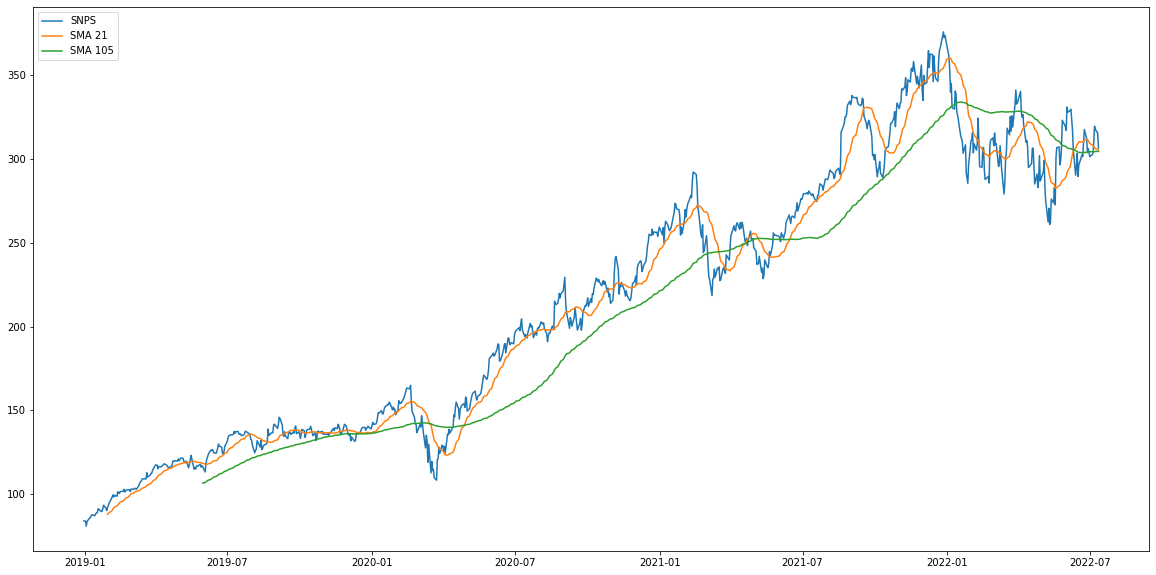

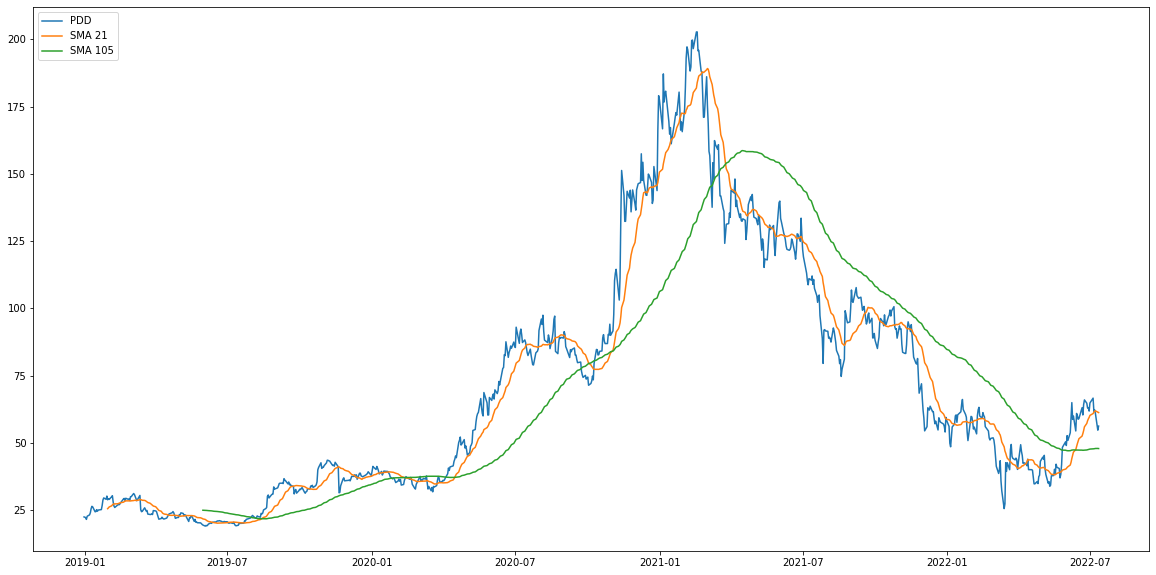

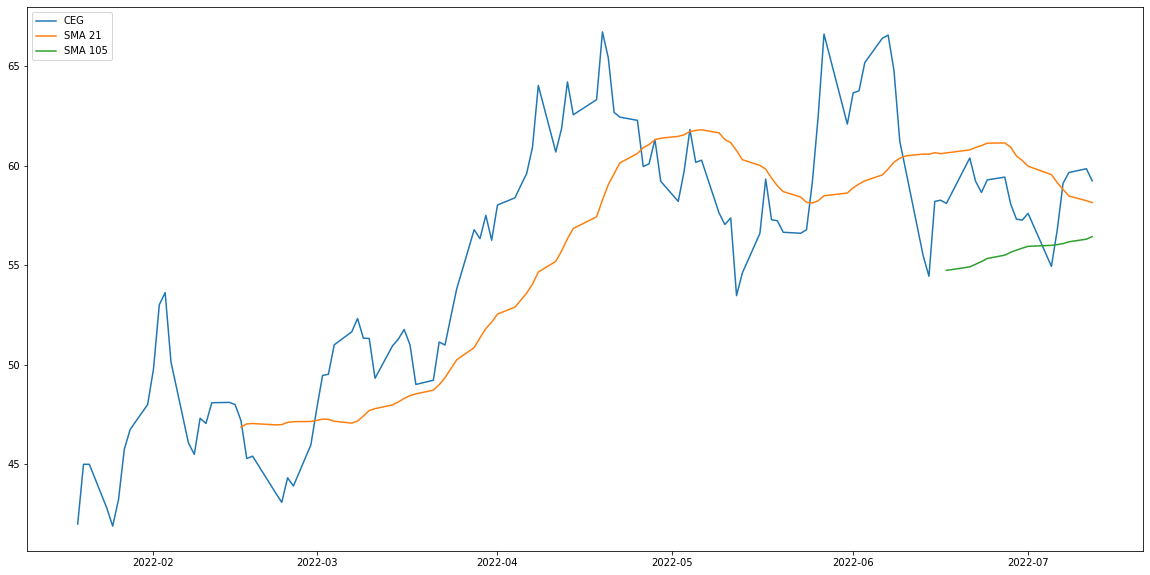

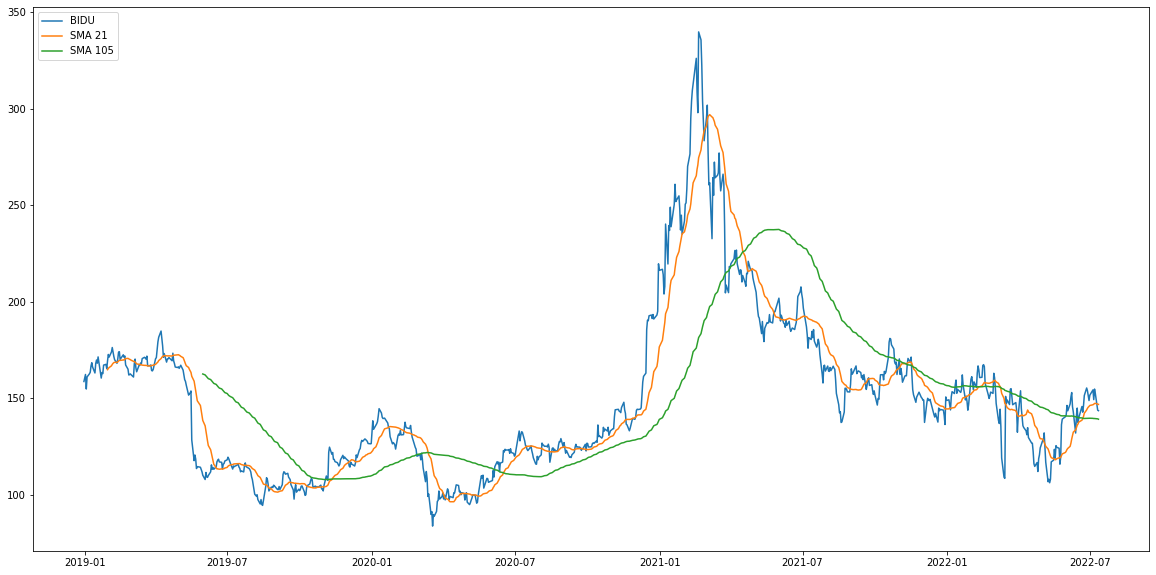

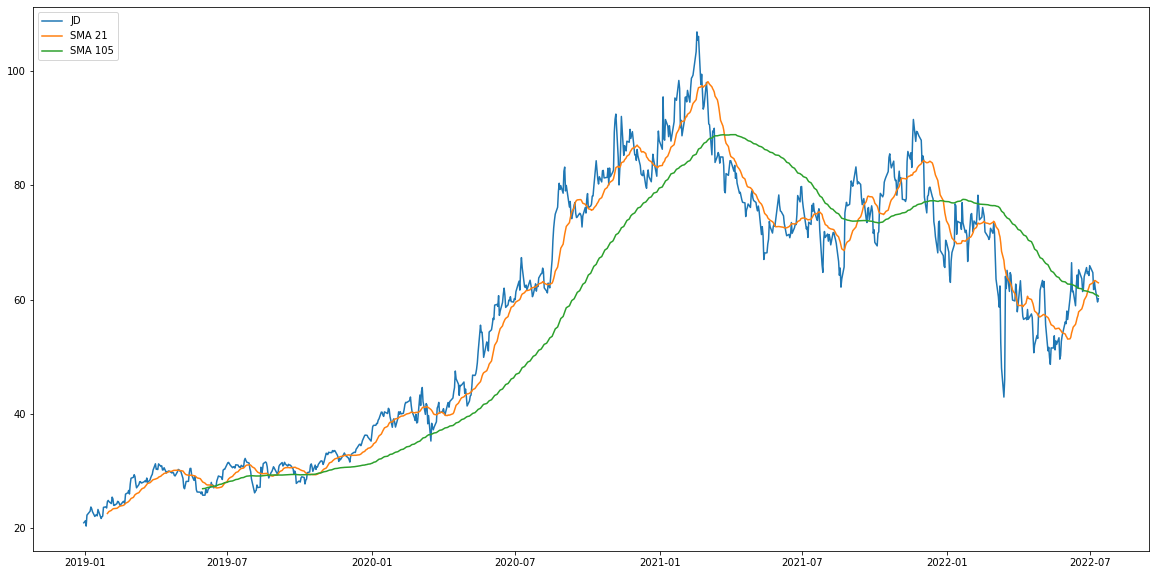

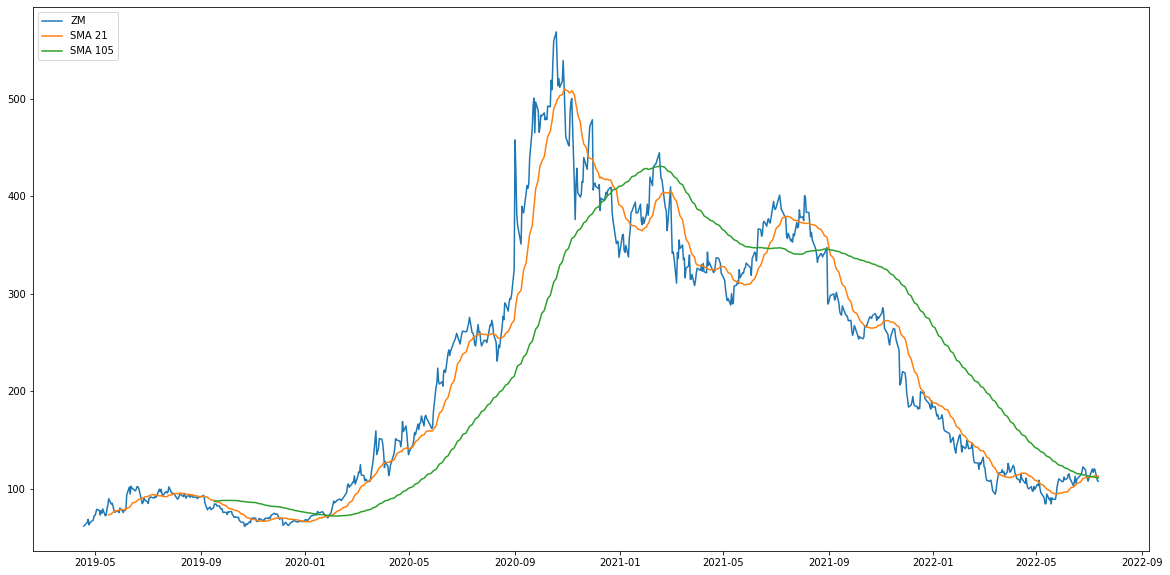

In [17]:
for quote in lead_comps:
    fig, ax = plt.subplots(figsize=(20, 10))
    plt.plot(data[quote], label=quote);
    plt.plot(ma[quote], label = f'SMA {ma_count}');
    plt.plot(ma_week[quote], label = f'SMA {ma_count1}');
    plt.legend(loc=2);